In [1]:
import networkx as nx
import numpy as np
from helper_functions import *
COLORS="brgymcbrgymc"


<class 'networkx.classes.multidigraph.MultiDiGraph'>


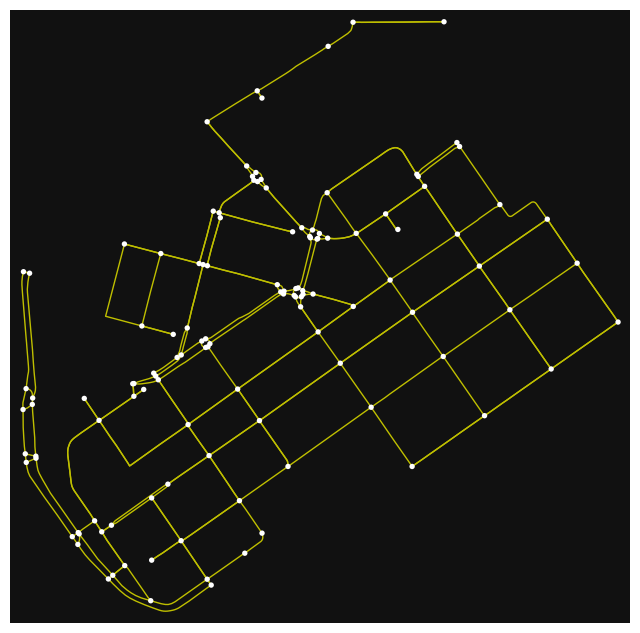

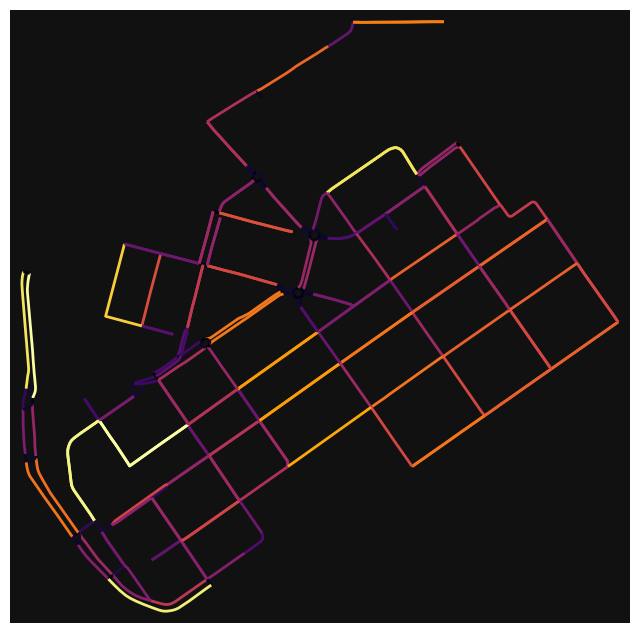

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

place = 'Kamppi, Helsinki, Finland'
graph = ox.graph_from_place(place,network_type='drive')

print(type(graph))
fig, ax = ox.plot_graph(graph,edge_color='y')


ec = ox.plot.get_edge_colors_by_attr(graph, 'length', cmap='inferno')
fig, ax = ox.plot_graph(graph, edge_color=ec, edge_linewidth=2, node_size=0)


In [3]:
g = nx.DiGraph(graph)

In [6]:
      
nastavi_ct(g,c_mode=2)
    

    
# plt.hist([l[i][2]["highway"] for i in range(len(l))])
# set([l[i][2]["highway"] for i in range(len(l))])
# LIST_OF_ROAD_TYPES = ['motorway','trunk','primary','primary_link','secondary','tertiary','unclassified','living_street','residential']
#ec = ox.plot.get_edge_colors_by_attr(g, 'c', cmap='inferno')
#fig, ax = ox.plot_graph(g, edge_color=ec, edge_linewidth=2, node_size=0)



In [7]:
list(g.edges(data=True))[0]

(25216594,
 1372425714,
 {'osmid': 23856784,
  'oneway': True,
  'lanes': '2',
  'name': 'Mechelininkatu',
  'highway': 'primary',
  'maxspeed': '40',
  'reversed': False,
  'length': 40.885,
  'geometry': <LINESTRING (24.921 60.165, 24.921 60.165, 24.921 60.165, 24.921 60.165, 24....>,
  'c': 2,
  't': 40.885})

In [25]:

# 0:
# 25291537
# 1:
# 25291565
# for e in g.edges():
#     if g.edges[e]["oneway"] == False:
#         pass
# ta je oneway = False in istocasno je podvojen tko da ne rabm podvajat
#print((25291537,25291565) in g.edges())
#(25291565,25291537) in g.edges()

In [10]:
ZK = [(25216594,3177642345,1),(2037356632,25238874,1),(56115897, 56113314, 1)]
ZK = get_random_ZK(g,num_ZK=5,max_a=1)
print(ZK)

[(25291591, 258189020, 1), (25416263, 846597959, 1), (1372425714, 267117317, 1), (25291565, 1371748756, 1), (301360197, 282730727, 1)]


In [11]:
paths = poklici_linprog(ZK,g,st_alternativ=10)
paths

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0.] Optimization terminated successfully. (HiGHS Status 7: Optimal)


[[25291591,
  1377610493,
  1372233754,
  1372318837,
  1372233731,
  266159814,
  266159806,
  1372318826,
  159619609,
  258189020],
 [25416263,
  282731082,
  282730717,
  282730727,
  282730739,
  282730985,
  949775435,
  1371751507,
  1371751505,
  846597954,
  846597959],
 [1372425714,
  25238874,
  1372425713,
  529507771,
  258188404,
  1372318829,
  159619609,
  175832743,
  1372425705,
  103062861,
  1372376935,
  149030036,
  149030035,
  1008183915,
  1372425724,
  337264937,
  1861896877,
  1861896879,
  724233128,
  267117317],
 [25291565,
  1377211666,
  1377211668,
  1371750095,
  1377211667,
  1371750094,
  1371748756],
 [301360197,
  846597947,
  2037356632,
  56113314,
  979855850,
  979855795,
  979855770,
  1371751516,
  949775435,
  282730985,
  1973739965,
  282730959,
  282730717,
  282730727]]

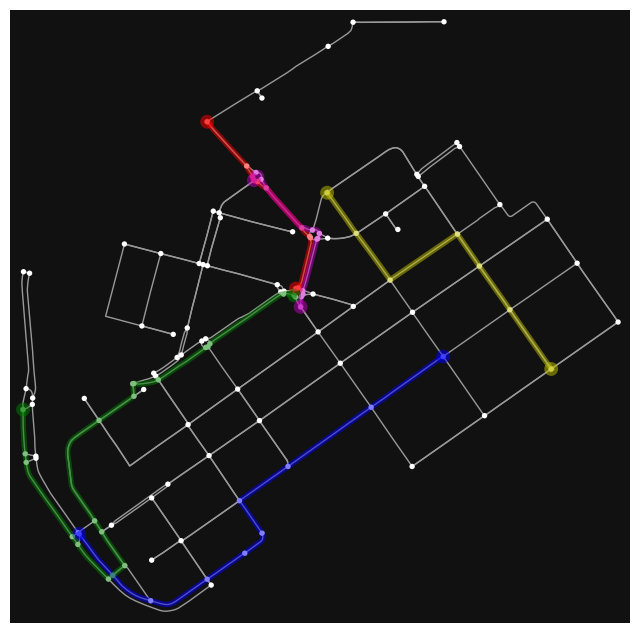

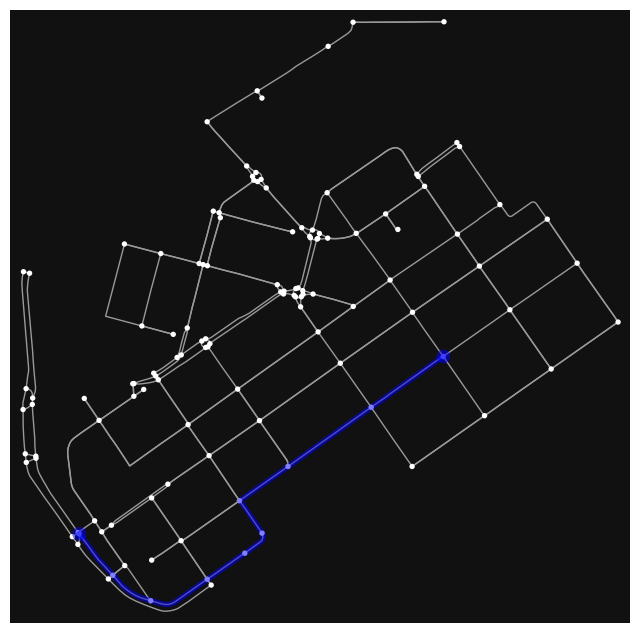

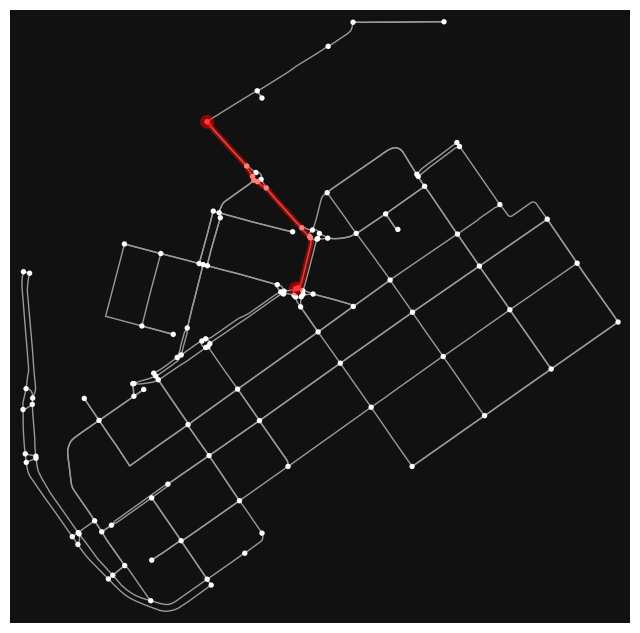

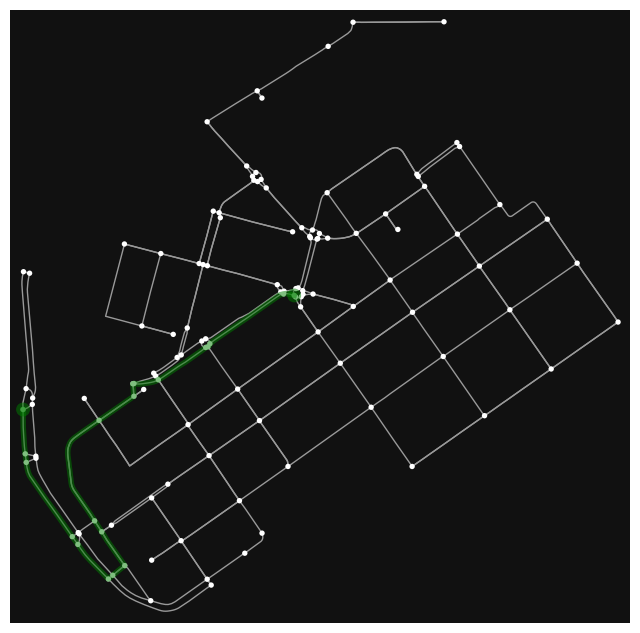

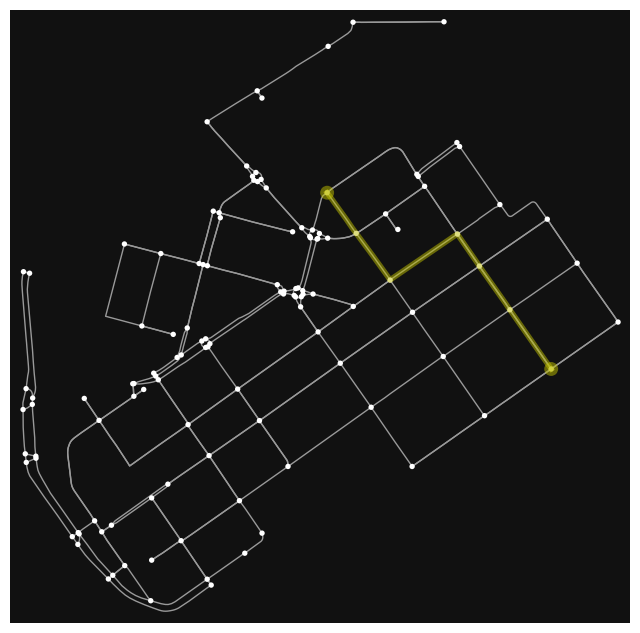

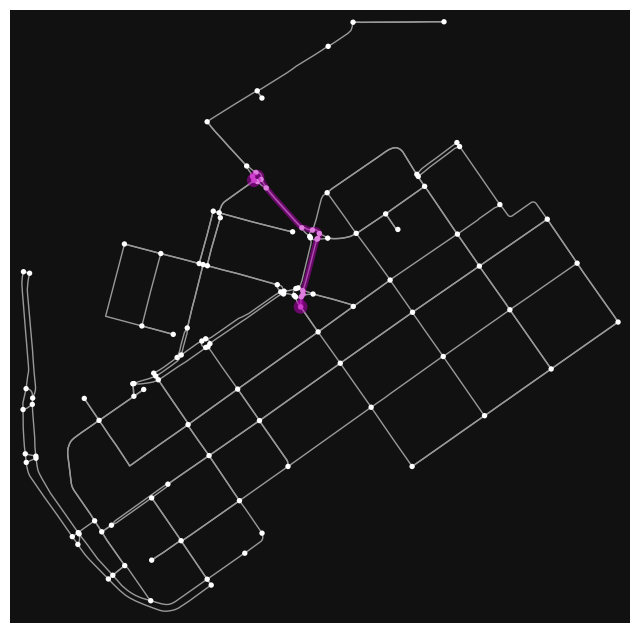

In [12]:
fig, ax = ox.plot_graph_routes(graph,paths,route_colors=list(COLORS)[:len(paths)])
for ci, path in enumerate(paths):
    fig, ax = ox.plot_graph_route(graph,path,route_color=COLORS[ci])